<a href="https://colab.research.google.com/github/lavanyalavany/Air-Quality-Prediction-Technical-Seminar-/blob/main/Air_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df=pd.read_csv("/content/data.csv",encoding='unicode_escape')
# Reading the dataset

In [9]:
df.head()
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(217617, 13)

In [11]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217617 entries, 0 to 217616
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     134275 non-null  object 
 1   sampling_date                217617 non-null  object 
 2   state                        217617 non-null  object 
 3   location                     217617 non-null  object 
 4   agency                       131028 non-null  object 
 5   type                         214660 non-null  object 
 6   so2                          195735 non-null  float64
 7   no2                          207031 non-null  float64
 8   rspm                         193142 non-null  float64
 9   spm                          111371 non-null  float64
 10  location_monitoring_station  200815 non-null  object 
 11  pm2_5                        5078 non-null    float64
 12  date                         217615 non-null  object 
dtyp

In [12]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                        83342
sampling_date                       0
state                               0
location                            0
agency                          86589
type                             2957
so2                             21882
no2                             10586
rspm                            24475
spm                            106246
location_monitoring_station     16802
pm2_5                          212539
date                                2
dtype: int64

In [13]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean,
#standard deviation, min values and max value present in the data

,so2,no2,rspm,spm,pm2_5
count,195735.000000,207031.000000,193142.000000,111371.000000,5078.000000
mean,10.161351,21.892656,95.039168,196.563491,37.762076
std,9.762569,15.024053,65.618539,132.047464,32.650556
min,0.000000,0.000000,0.000000,0.000000,4.000000
25%,4.000000,12.400000,53.000000,104.000000,23.000000
50%,7.000000,18.300000,80.000000,173.000000,30.000000
75%,13.200000,27.600000,118.000000,258.000000,37.000000
max,273.300000,696.000000,1082.000000,2213.000000,395.000000


In [14]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        391
sampling_date                  5306
state                            19
location                        182
agency                           39
type                             10
so2                            2236
no2                            3192
rspm                           3342
spm                            3426
location_monitoring_station     527
pm2_5                           407
date                           4984
dtype: int64

In [15]:
df.columns
# These are all the columns present in the dataset.


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

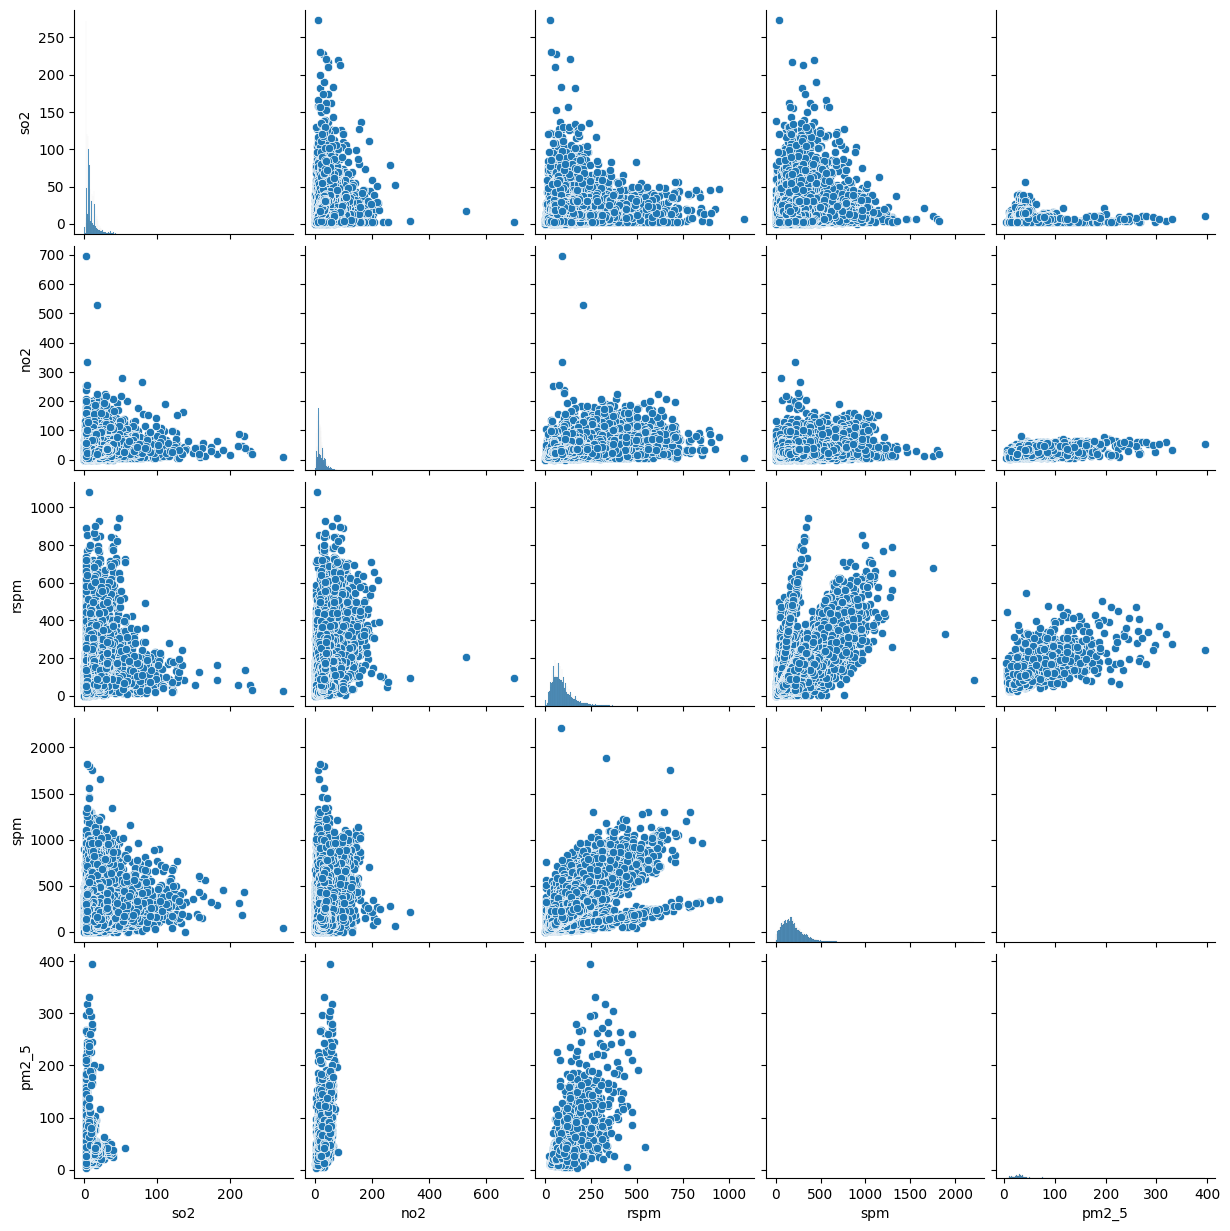

In [16]:
sns.pairplot(data=df)

In [17]:
df['state'].value_counts()
# Viewing the count of values present in the state column

Andhra Pradesh          26368
Kerala                  24728
Himachal Pradesh        22896
Gujarat                 21279
Maharashtra             20380
Madhya Pradesh          19920
Assam                   19361
Karnataka               17119
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Haryana                  3420
Bihar                    2275
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Arunachal Pradesh          90
Name: state, dtype: int64

[]

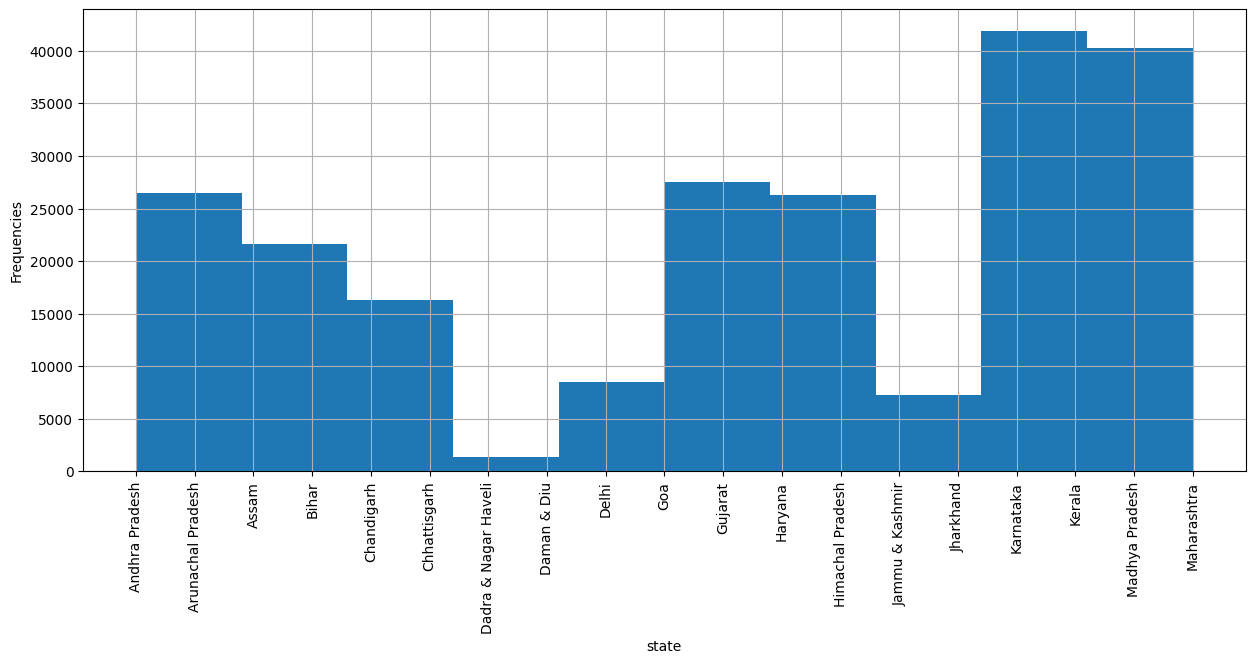

In [18]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [19]:
df['type'].value_counts()
# Viewing the count of values present in the type column

Residential, Rural and other Areas    82360
Residential and others                51084
Industrial Area                       42328
Industrial Areas                      29174
Sensitive Area                         5829
Sensitive Areas                        3084
RIRUO                                   473
Sensitive                               155
Industrial                               92
Residential                              81
Name: type, dtype: int64

[]

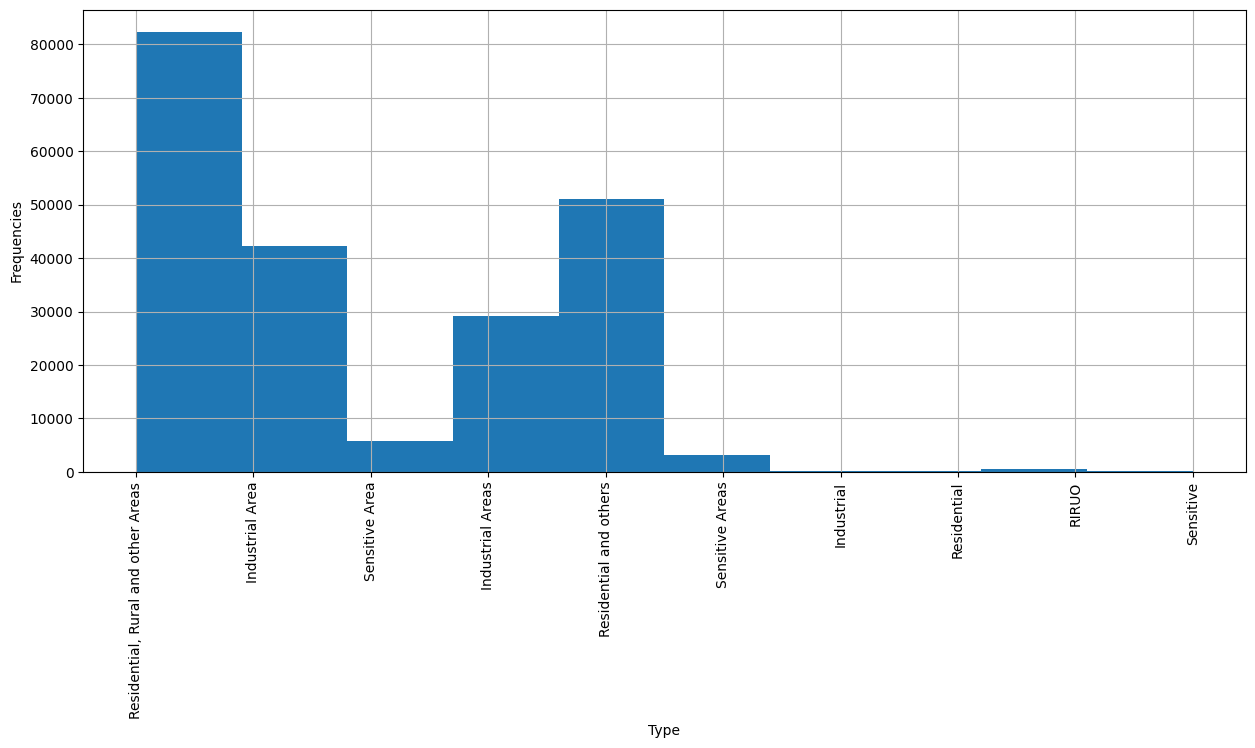

In [20]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [21]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

Andhra Pradesh State Pollution Control Board                              15691
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Kerala State Pollution Control Board                                      13782
Assam State Pollution Control Board                                       13427
Karnataka State Pollution Control Board                                   10050
Madhya Pradesh State Pollution Control Board                               9977
Gujarat State Pollution Control Board                                      8763
National Environmental Engineering Research Institute                      5650
Goa State Pollution Control Board                                          5040
Chandigarh Pollution Control Committee                                     4614
Chattisgarh Environment Conservation Board                                 4051
Jharkhand State Pollution Control Board                                    3810
Central Pollution Control Board         

[]

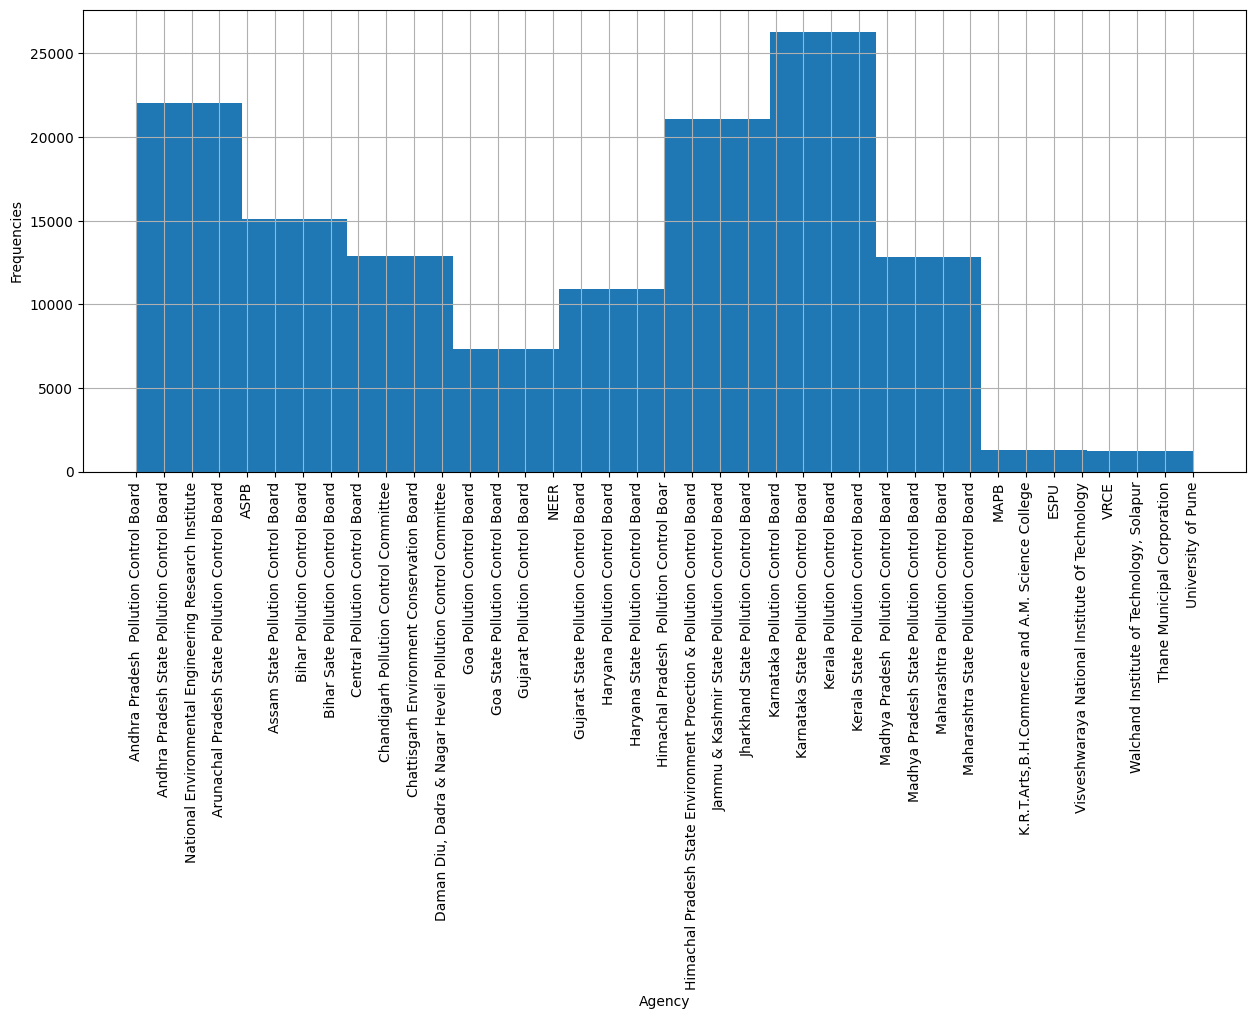

In [22]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

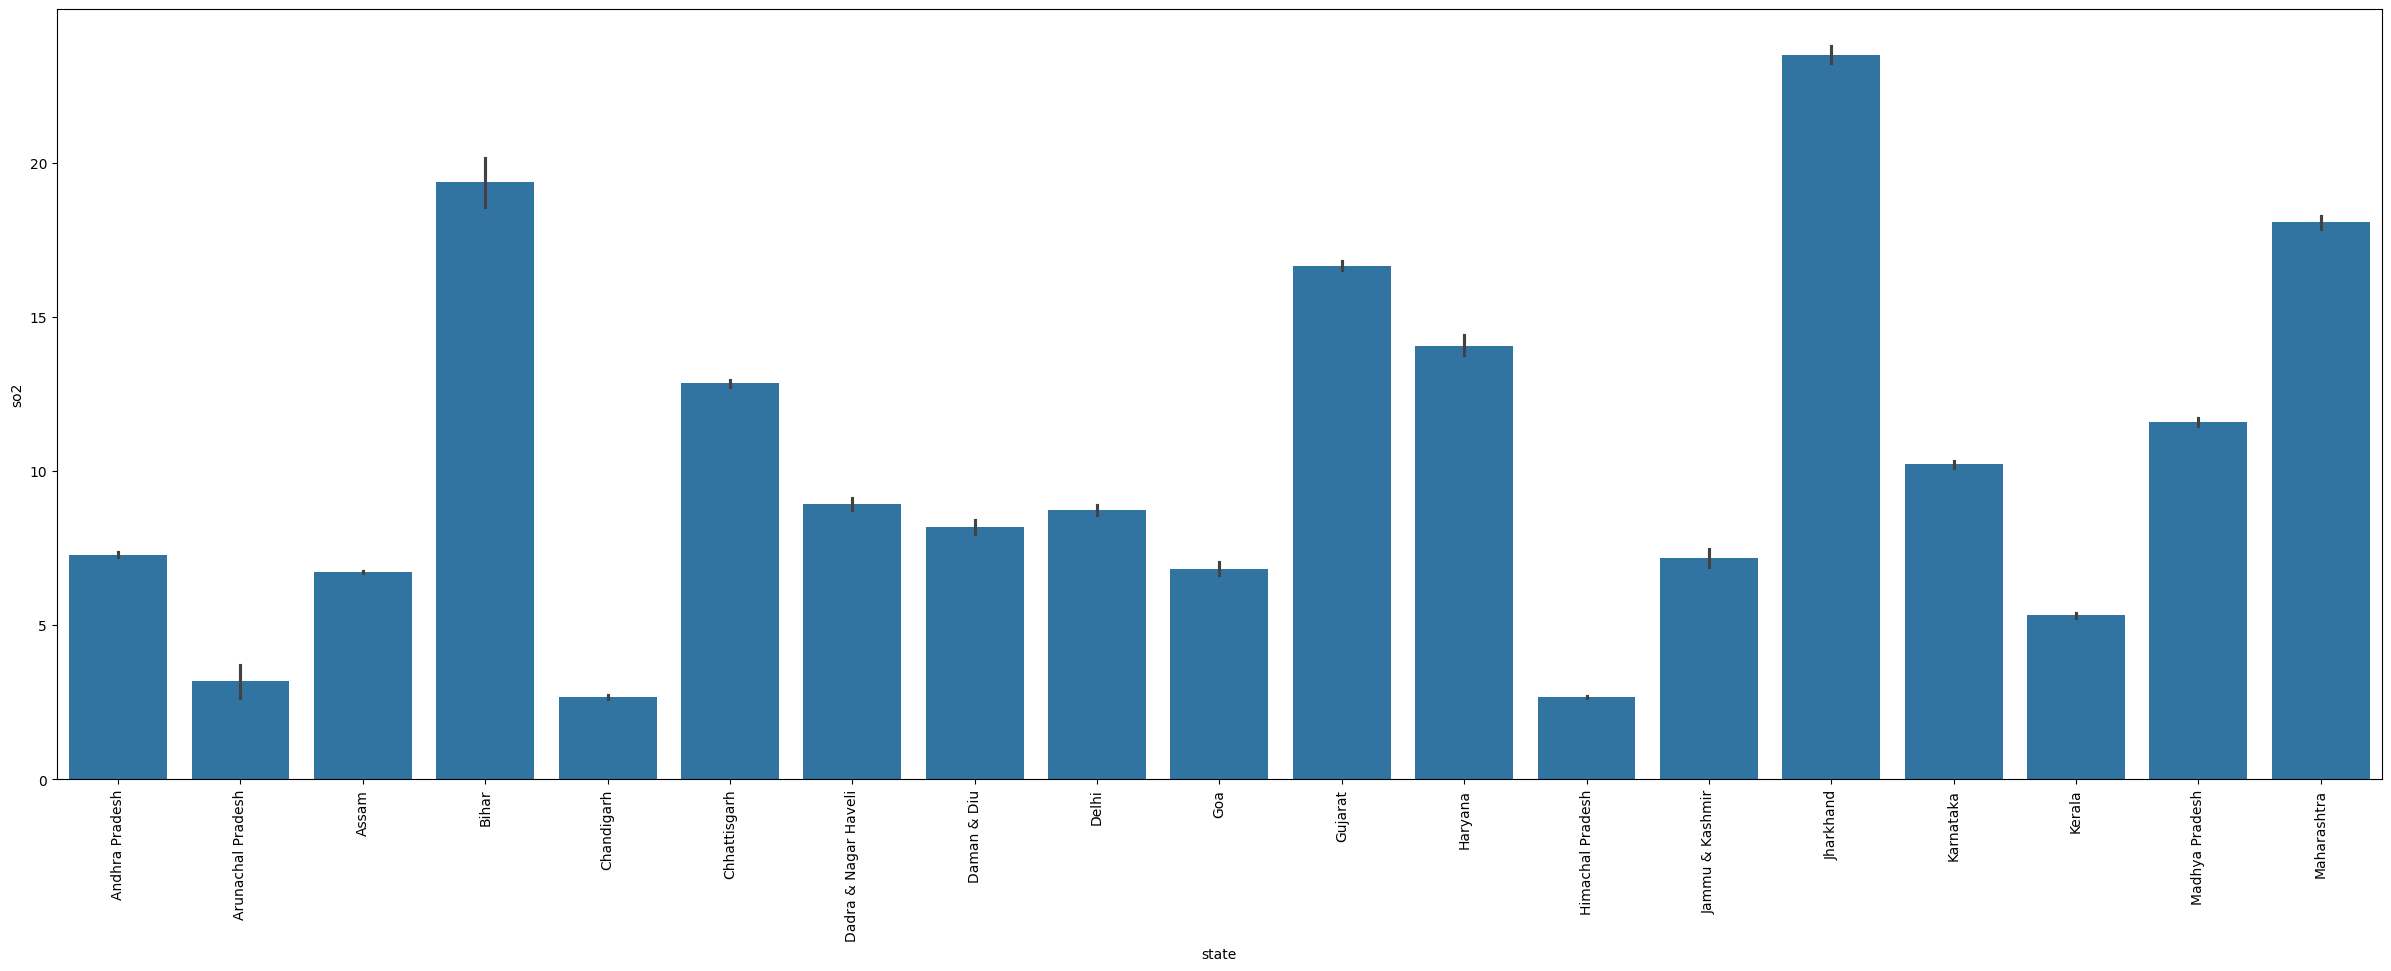

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels
# in the air which is Uttaranchal followed by Uttarakhand

In [24]:
plt.rcParams['figure.figsize']=(30,10)

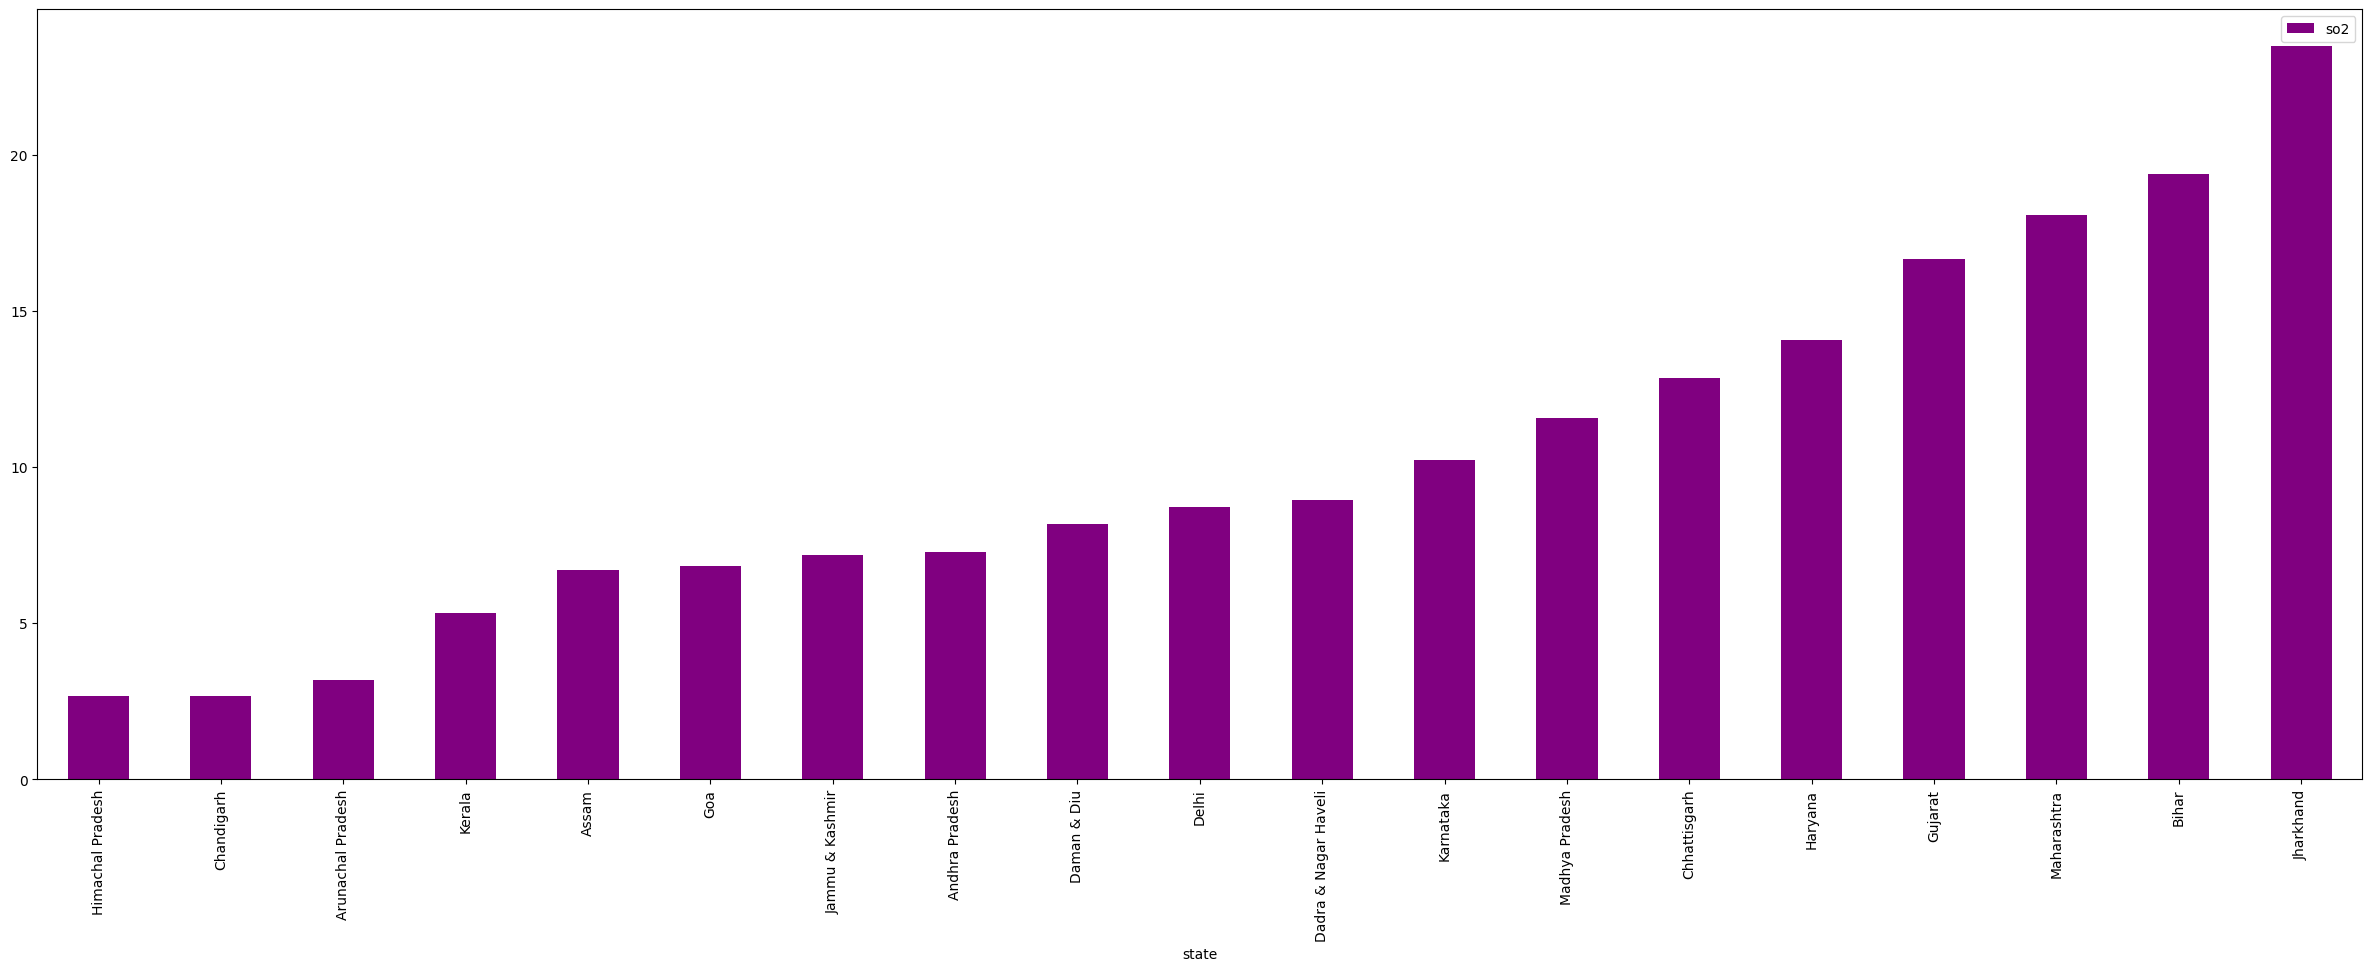

In [25]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

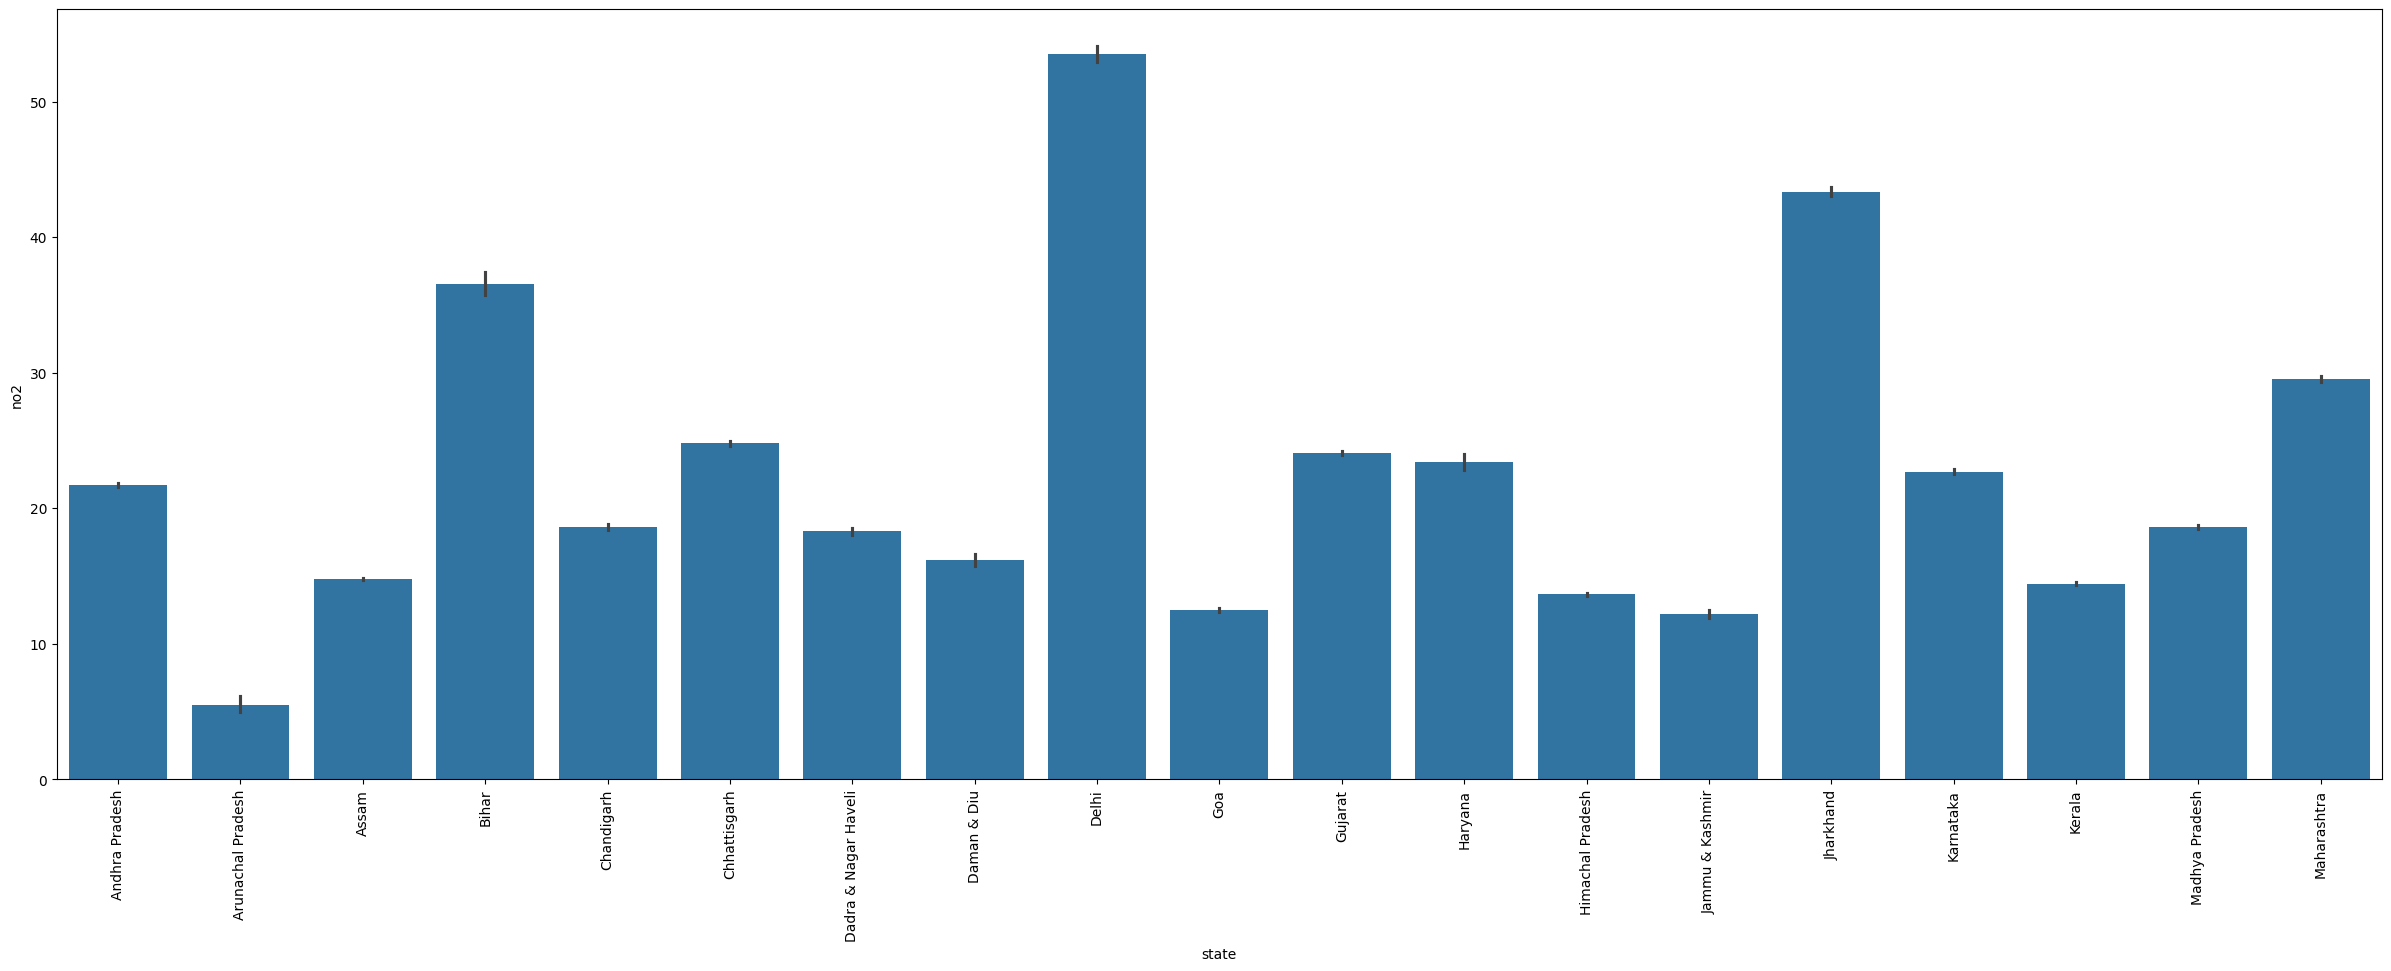

In [26]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states

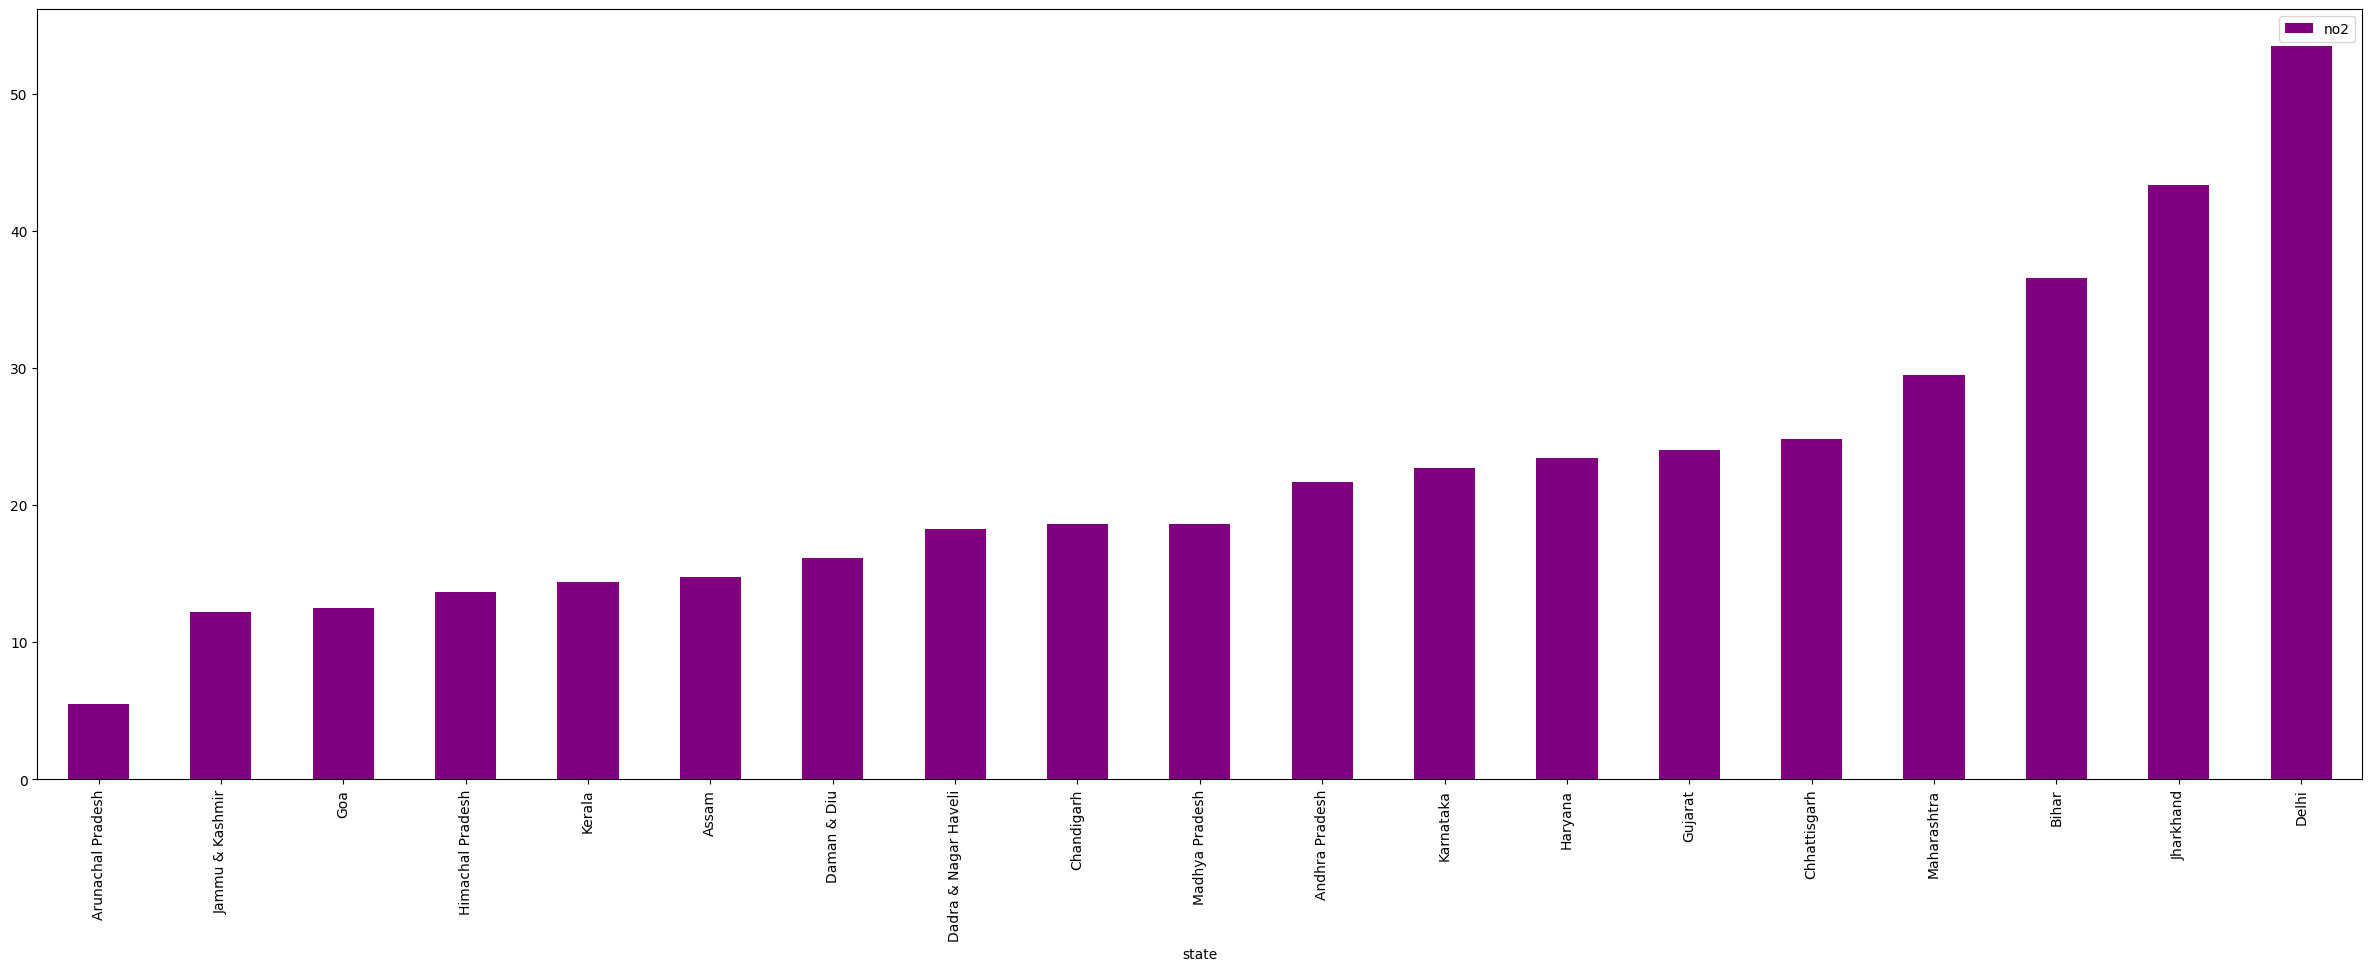

In [27]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

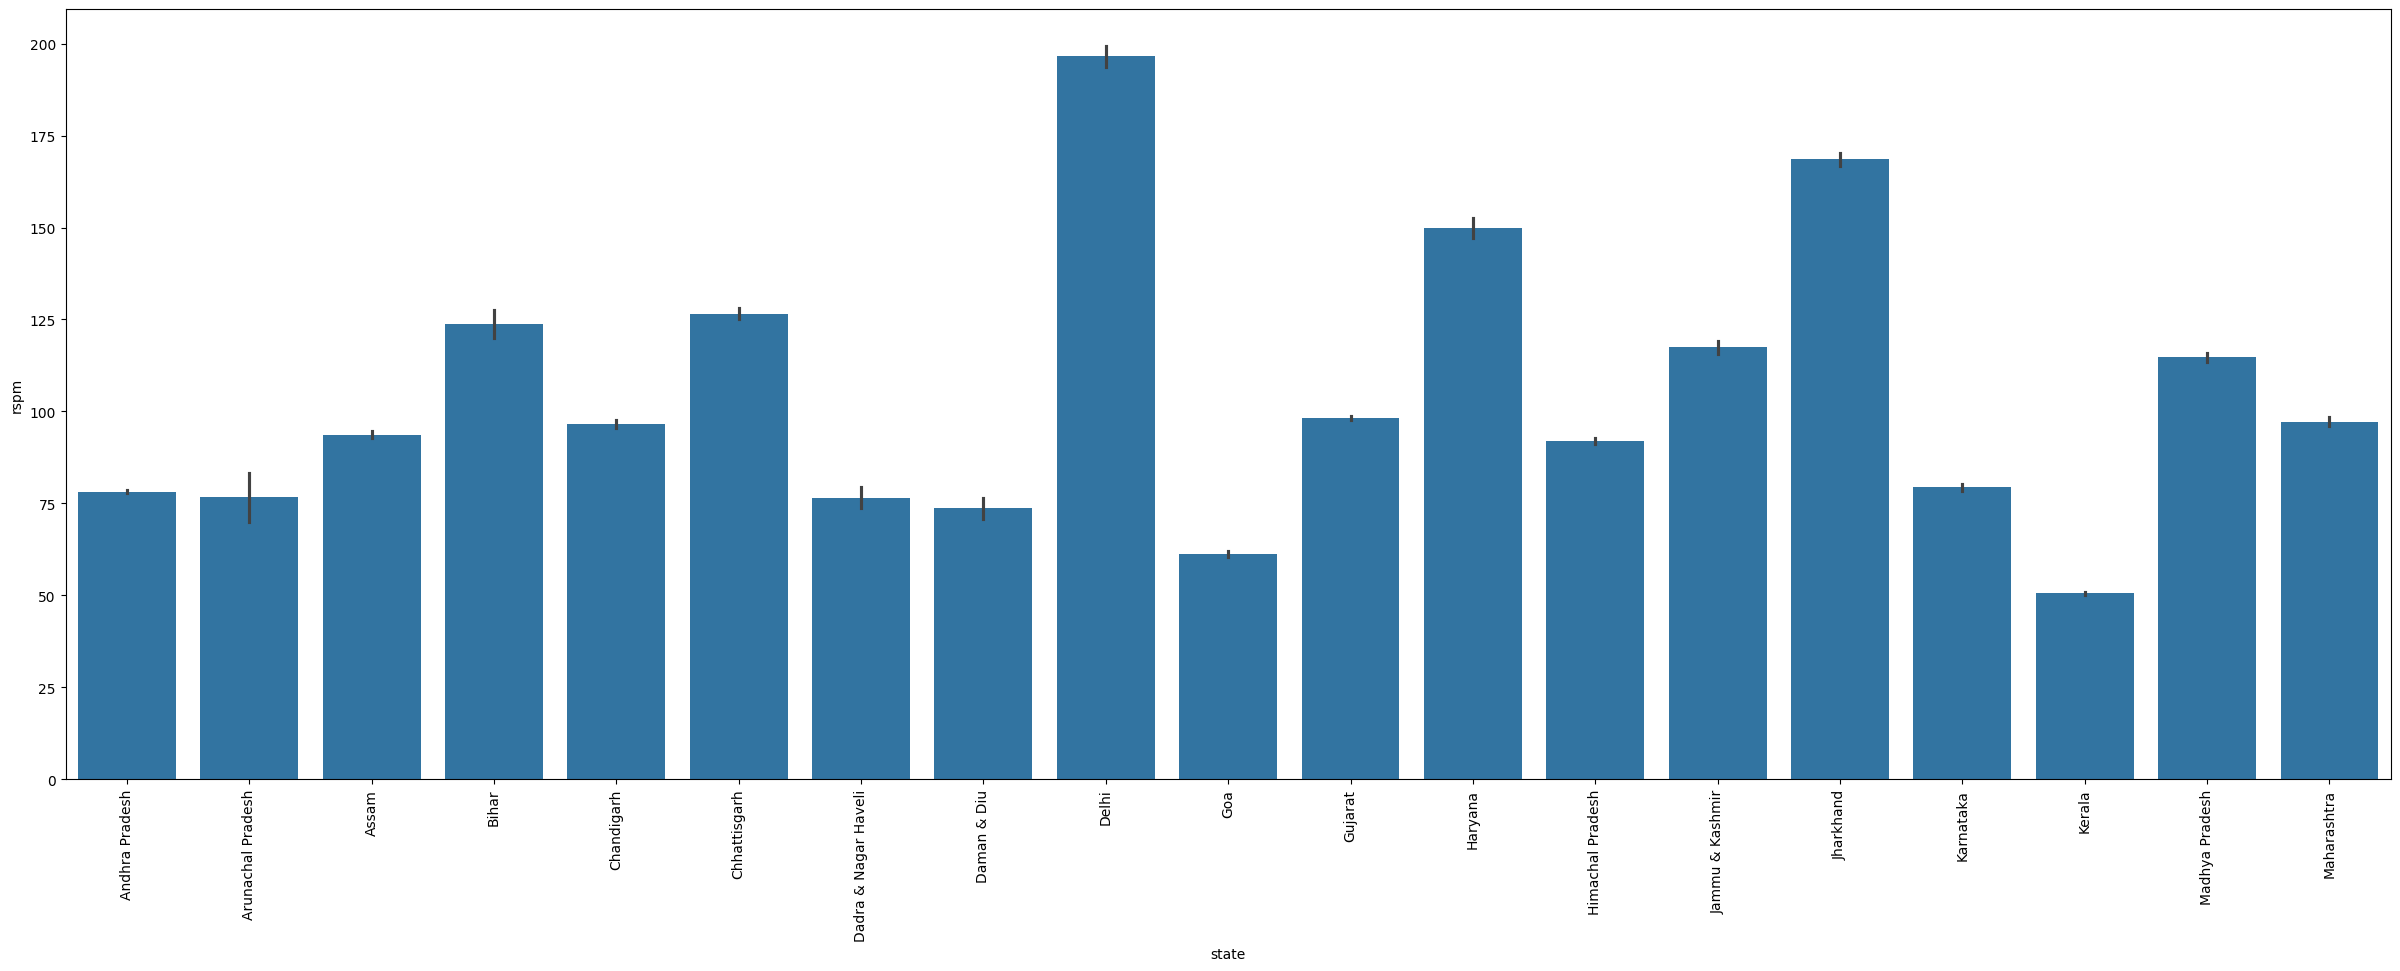

In [28]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states

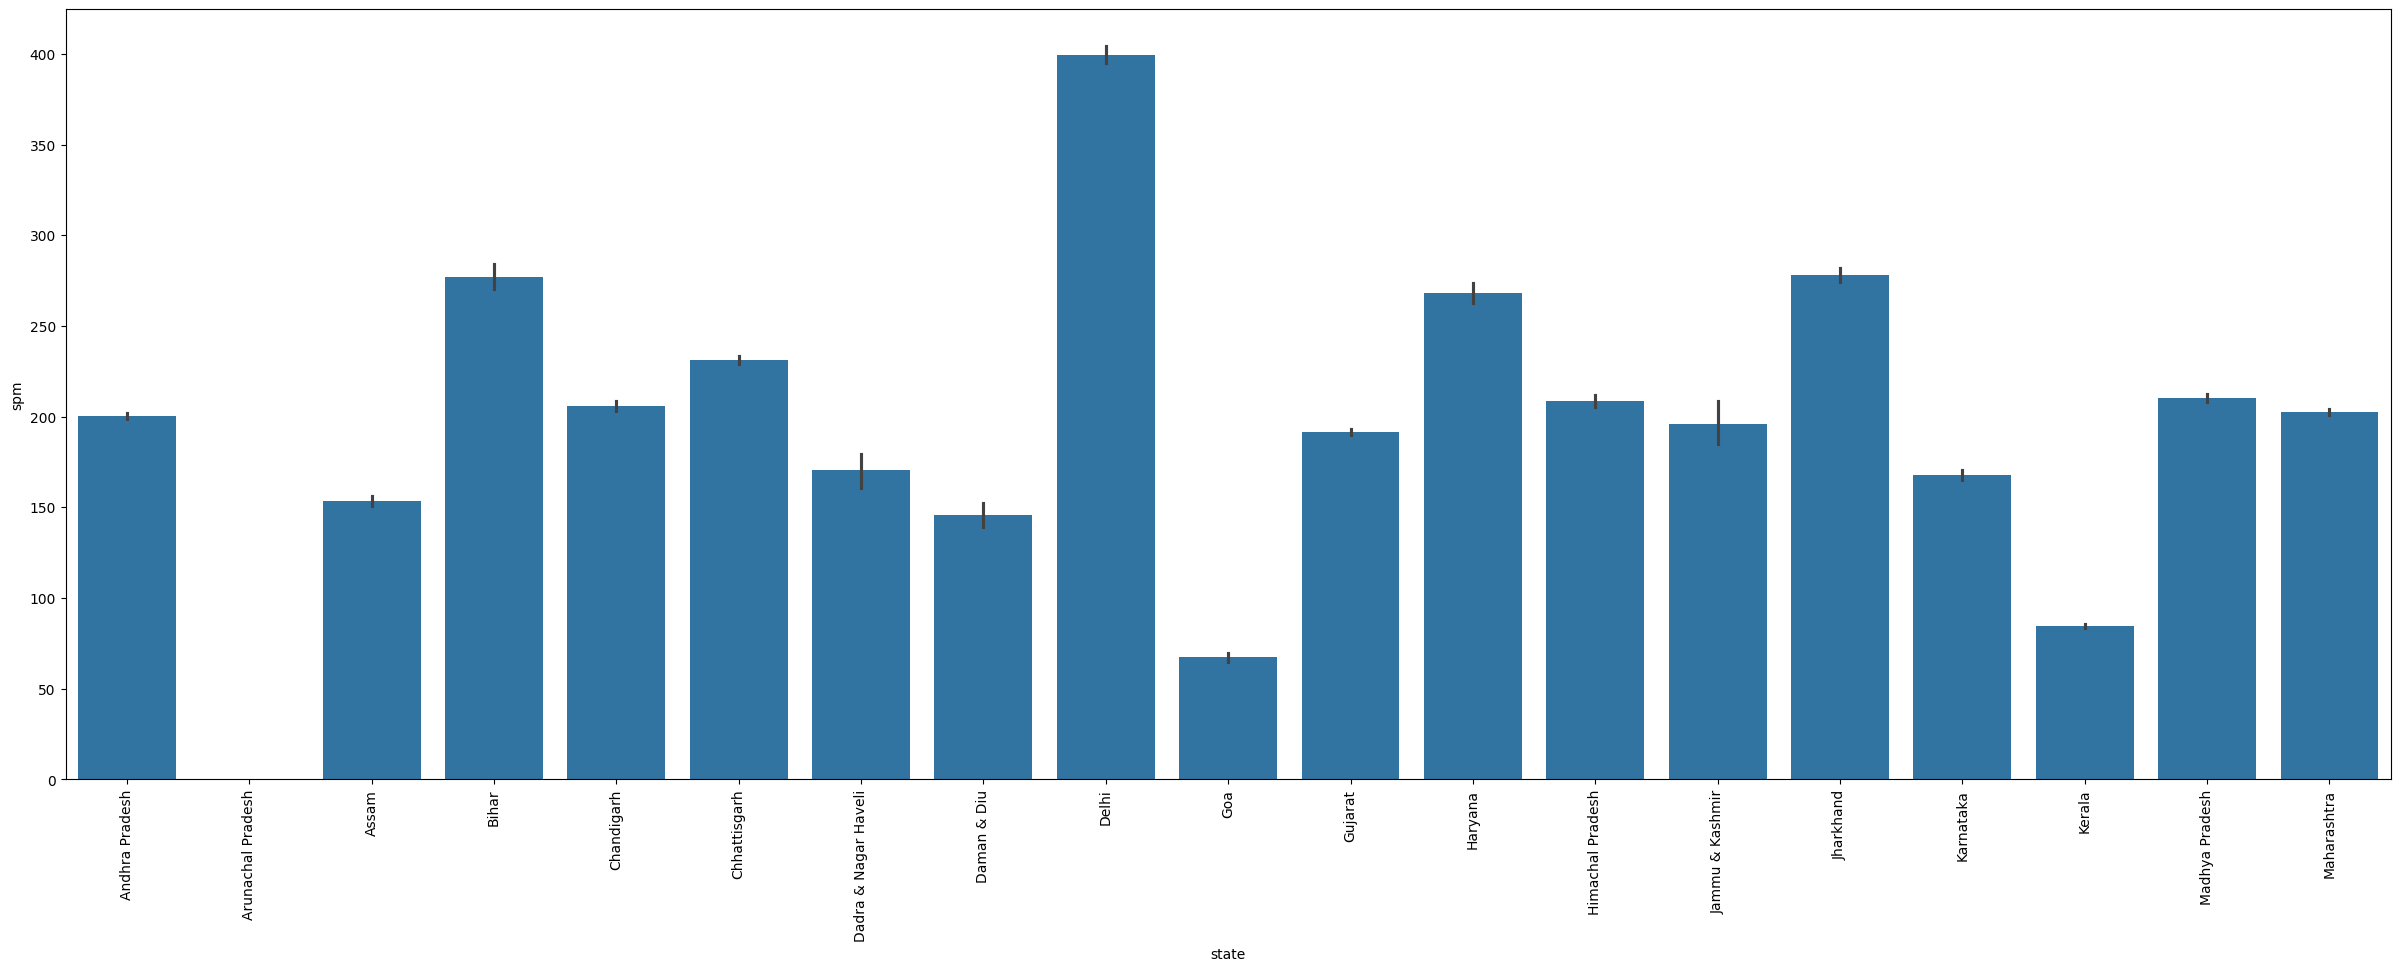

In [29]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states

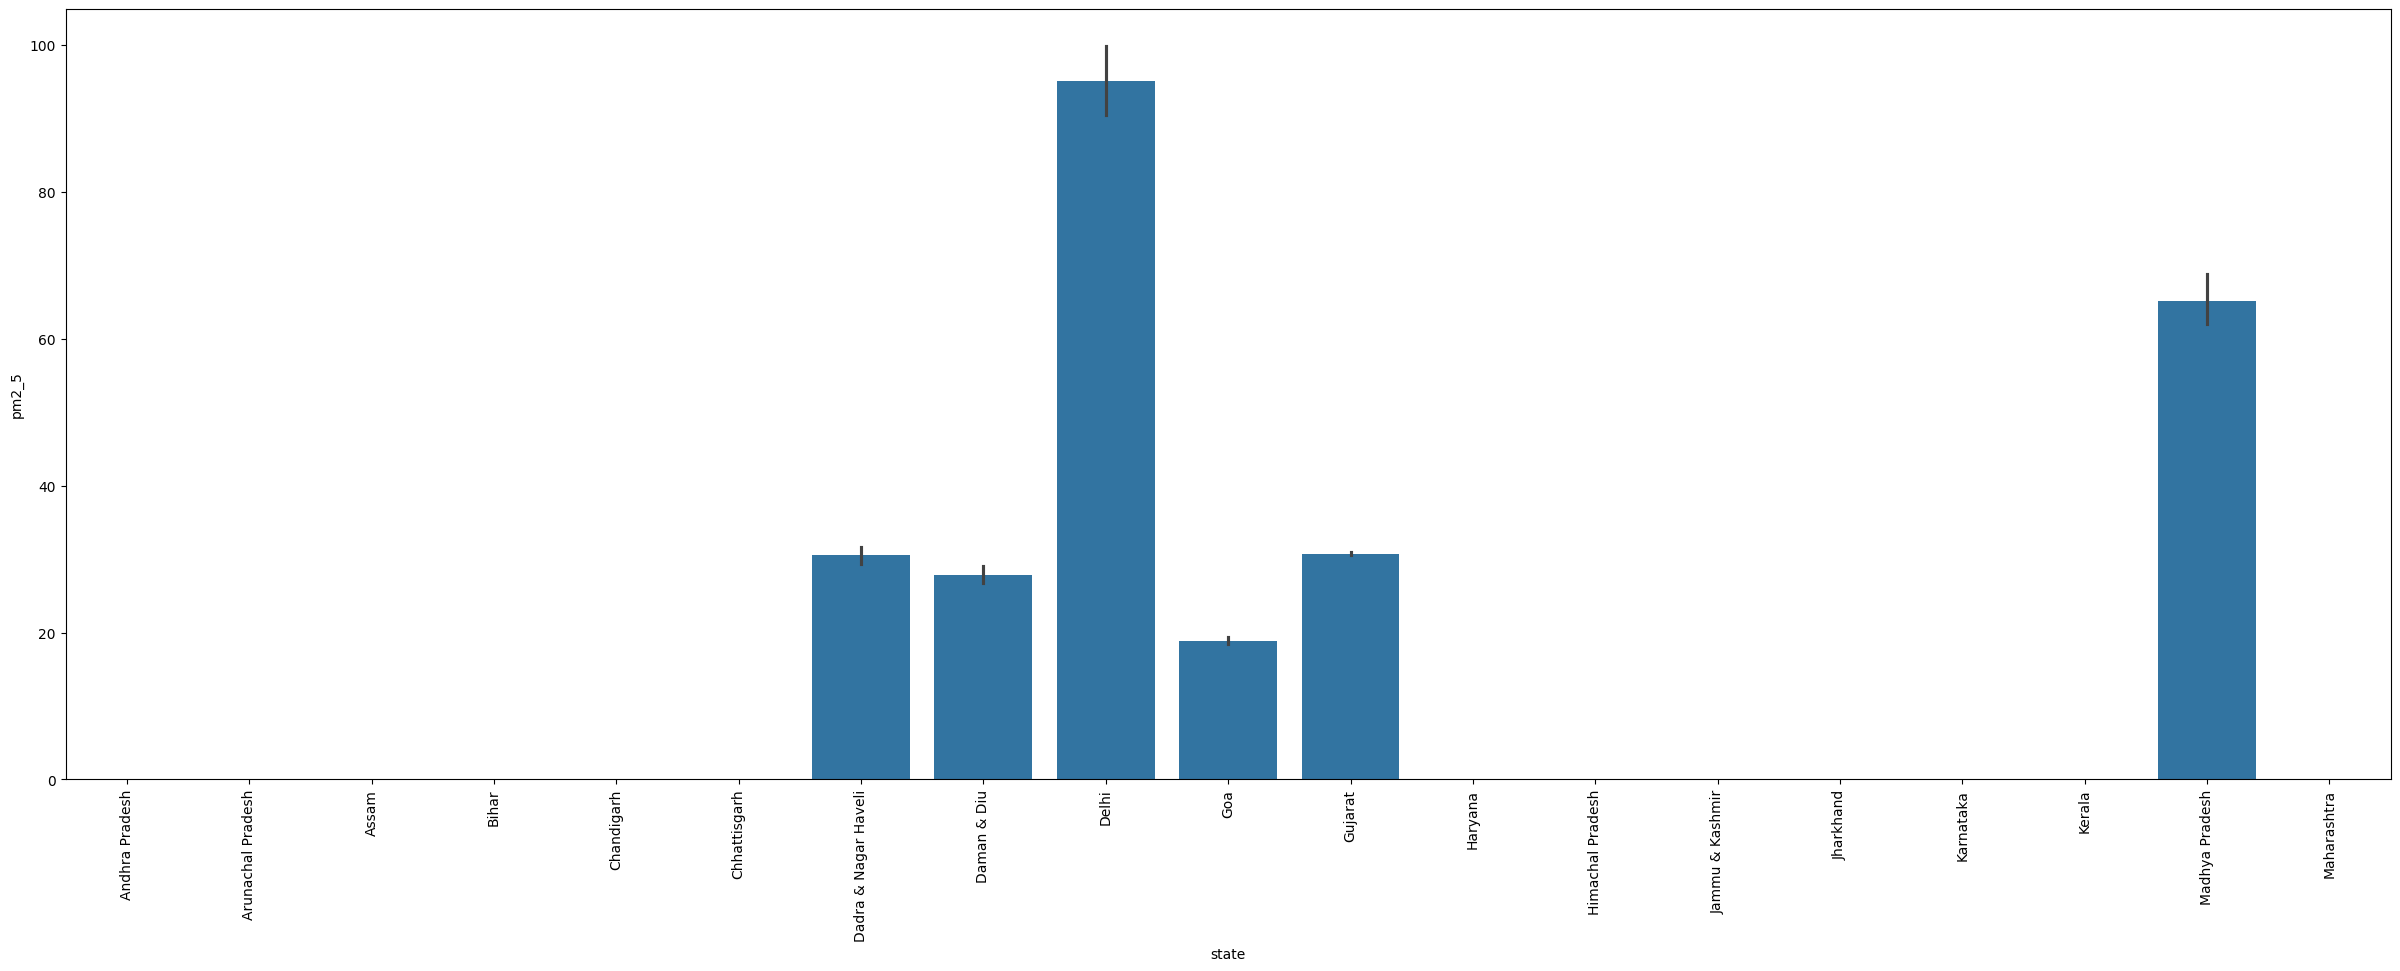

In [30]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states

In [31]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [32]:
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          212539
spm                            106246
agency                          86589
stn_code                        83342
rspm                            24475
so2                             21882
location_monitoring_station     16802
no2                             10586
type                             2957
date                                2
sampling_date                       0
state                               0
location                            0
dtype: int64

In [33]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [77]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [78]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
pm2_5,212539,97.666543
spm,106246,48.822473
agency,86589,39.789630
stn_code,83342,38.297559
rspm,24475,11.246824
so2,21882,10.055281
location_monitoring_station,16802,7.720904
no2,10586,4.864510
type,2957,1.358809
date,2,0.000919


In [35]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [36]:
df.isnull().sum()
# Now checking the null values

state            0
location         0
type          2957
so2          21882
no2          10586
rspm         24475
spm         106246
pm2_5       212539
dtype: int64

In [37]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
217612,Maharashtra,Nashik,Residential and others,30.8,38.5,283.0,414.0,NaN
217613,Maharashtra,Nashik,Residential and others,31.3,36.2,168.0,311.0,NaN
217614,Maharashtra,Nashik,Residential and others,30.7,38.2,226.0,334.0,NaN
217615,Maharashtra,Nashik,Residential and others,30.8,36.5,175.0,261.0,NaN


In [38]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [39]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [40]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [41]:
df
# The following features are important for our machine learning models.

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
217612,Maharashtra,Nashik,Residential and others,30.8,38.5,283.0,414.0,0.0
217613,Maharashtra,Nashik,Residential and others,31.3,36.2,168.0,311.0,0.0
217614,Maharashtra,Nashik,Residential and others,30.7,38.2,226.0,334.0,0.0
217615,Maharashtra,Nashik,Residential and others,30.8,36.5,175.0,261.0,0.0


In [42]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [43]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [44]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [45]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [46]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [47]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [48]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Good              108603
Poor               56235
Moderate           23040
Unhealthy          17606
Very unhealthy      6448
Hazardous           5685
Name: AQI_Range, dtype: int64

In [49]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


from matplotlib import pyplot as plt
_df_0['SOi'].plot(kind='hist', bins=20, title='SOi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Noi'].plot(kind='hist', bins=20, title='Noi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='SOi', y='Noi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Rpi']
  ys = series['SOi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Rpi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rpi')
_ = plt.ylabel('SOi')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Rpi']
  ys = series['Noi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Rpi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rpi')
_ = plt.ylabel('Noi')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rpi']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rpi'}, axis=1)
              .sort_values('Rpi', ascending=True))
  xs = counted['Rpi']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Rpi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rpi')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SPMi']
  ys = series['SOi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('SPMi', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SPMi')
_ = plt.ylabel('SOi')

from matplotlib import pyplot as plt
_df_7['SOi'].plot(kind='line', figsize=(8, 4), title='SOi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Noi'].plot(kind='line', figsize=(8, 4), title='Noi')
plt.gca().spines[['top', 'right']].set_visible(False)

In [50]:
Y.head()
# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(174093, 4) (43524, 4) (174093,) (43524,)


In [52]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [53]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [54]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  11.050315303966462
RMSE TestData =  10.987063393333239
--------------------------------------------------
RSquared value on train: 0.9883064740458438
RSquared value on test: 0.9885025422761129


In [55]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [56]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [57]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.51291137414089e-13
RMSE TestData =  0.7264747486930863
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9999497333888121


In [58]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [59]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [60]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.39836403332907355
RMSE TestData =  0.7611553979281275
--------------------------------------------------
RSquared value on train: 0.9999848030517235
RSquared value on test: 0.9999448195517633


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [63]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

In [64]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)


Model accuracy on train is:  0.732742124647641
Model accuracy on test is:  0.7312362491993205
--------------------------------------------------


In [65]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Moderate'], dtype=object)

In [66]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Good'], dtype=object)

In [67]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [68]:
log_reg.predict([[2,45.8,37,32]])

array(['Good'], dtype=object)

In [69]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999303756927619
--------------------------------------------------


In [70]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999025259698666
--------------------------------------------------


In [71]:
RF.predict([[727,327.55,78.2,100]])

array(['Unhealthy'], dtype=object)

In [72]:
RF.predict([[7.4,47.7,78.182,100]])
# Predictions on random values

array(['Moderate'], dtype=object)

In [73]:
RF.predict([[1,1.2,3.12,0]])
# Predictions on random values

array(['Good'], dtype=object)

In [74]:
RF.predict([[325.7,345,798.182,203]])
# Predictions on random values

array(['Unhealthy'], dtype=object)

In [75]:
DT2.predict([[727,327.55,78.2,100]])

array(['Unhealthy'], dtype=object)

In [76]:
DT2.predict([[325.7,345,798.182,203]])

array(['Unhealthy'], dtype=object)